<a href="https://colab.research.google.com/github/jolonia/Spotify/blob/main/Spotify_w_pycaret.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install pycaret[full]

In [ ]:
!pip install pyyaml==5.4.1

In [ ]:
!pip install git+https://github.com/slundberg/shap.git

  Cloning https://github.com/slundberg/shap.git to /tmp/pip-req-build-q9etnjht
  Running command git clone -q https://github.com/slundberg/shap.git /tmp/pip-req-build-q9etnjht
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done


In [ ]:
from pycaret.regression import *

/usr/local/lib/python3.7/dist-packages/distributed/config.py:20: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  defaults = yaml.load(f)


In [ ]:
import pandas as pd
import numpy as np


In [ ]:
spotify = pd.read_csv('/content/drive/MyDrive/Copy of Project_3_Spotify (1).csv',skipinitialspace=True, skip_blank_lines= True, infer_datetime_format=True,)

In [ ]:
spotify.head()

,Index,Highest Charting Position,Number of Times Charted,Week of Highest Charting,Song Name,Streams,Artist,Artist Followers,Song ID,Genre,Release Date,Weeks Charted,Popularity,Danceability,Energy,Loudness,Speechiness,Acousticness,Liveness,Tempo,Duration (ms),Valence,Chord
0,1,1,8,2021-07-23--2021-07-30,Beggin',"48,633,449",Måneskin,3377762.0,3Wrjm47oTz2sjIgck11l5e,"['indie rock italiano', 'italian pop']",2017-12-08,2021-07-23--2021-07-30\n2021-07-16--2021-07-23...,100.0,0.714,0.800,-4.808,0.0504,0.1270,0.3590,134.002,211560.0,0.589,B
1,2,2,3,2021-07-23--2021-07-30,STAY (with Justin Bieber),"47,248,719",The Kid LAROI,2230022.0,5HCyWlXZPP0y6Gqq8TgA20,['australian hip hop'],2021-07-09,2021-07-23--2021-07-30\n2021-07-16--2021-07-23...,99.0,0.591,0.764,-5.484,0.0483,0.0383,0.1030,169.928,141806.0,0.478,C#/Db
2,3,1,11,2021-06-25--2021-07-02,good 4 u,"40,162,559",Olivia Rodrigo,6266514.0,4ZtFanR9U6ndgddUvNcjcG,['pop'],2021-05-21,2021-07-23--2021-07-30\n2021-07-16--2021-07-23...,99.0,0.563,0.664,-5.044,0.1540,0.3350,0.0849,166.928,178147.0,0.688,A
3,4,3,5,2021-07-02--2021-07-09,Bad Habits,"37,799,456",Ed Sheeran,83293380.0,6PQ88X9TkUIAUIZJHW2upE,"['pop', 'uk pop']",2021-06-25,2021-07-23--2021-07-30\n2021-07-16--2021-07-23...,98.0,0.808,0.897,-3.712,0.0348,0.0469,0.3640,126.026,231041.0,0.591,B
4,5,5,1,2021-07-23--2021-07-30,INDUSTRY BABY (feat. Jack Harlow),"33,948,454",Lil Nas X,5473565.0,27NovPIUIRrOZoCHxABJwK,"['lgbtq+ hip hop', 'pop rap']",2021-07-23,2021-07-23--2021-07-30,96.0,0.736,0.704,-7.409,0.0615,0.0203,0.0501,149.995,212000.0,0.894,D#/Eb


In [ ]:
spotify.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1556 entries, 0 to 1555
Data columns (total 23 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Index                      1556 non-null   int64  
 1   Highest Charting Position  1556 non-null   int64  
 2   Number of Times Charted    1556 non-null   int64  
 3   Week of Highest Charting   1556 non-null   object 
 4   Song Name                  1556 non-null   object 
 5   Streams                    1556 non-null   object 
 6   Artist                     1556 non-null   object 
 7   Artist Followers           1545 non-null   float64
 8   Song ID                    1545 non-null   object 
 9   Genre                      1545 non-null   object 
 10  Release Date               1545 non-null   object 
 11  Weeks Charted              1556 non-null   object 
 12  Popularity                 1545 non-null   float64
 13  Danceability               1545 non-null   float

In [ ]:
spotify.dtypes

Index                          int64
Highest Charting Position      int64
Number of Times Charted        int64
Week of Highest Charting      object
Song Name                     object
Streams                       object
Artist                        object
Artist Followers             float64
Song ID                       object
Genre                         object
Release Date                  object
Weeks Charted                 object
Popularity                   float64
Danceability                 float64
Energy                       float64
Loudness                     float64
Speechiness                  float64
Acousticness                 float64
Liveness                     float64
Tempo                        float64
Duration (ms)                float64
Valence                      float64
Chord                         object
dtype: object

In [ ]:
spotify.shape

(1556, 23)

In [ ]:
#spotify_sample = spotify.sample(1000)

In [ ]:
data = spotify

# creating bool series True for NaN values
bool_series = pd.isnull(data["Popularity"])

# filtering data
# displayind data only with team = NaN
data[bool_series]

,Index,Highest Charting Position,Number of Times Charted,Week of Highest Charting,Song Name,Streams,Artist,Artist Followers,Song ID,Genre,Release Date,Weeks Charted,Popularity,Danceability,Energy,Loudness,Speechiness,Acousticness,Liveness,Tempo,Duration (ms),Valence,Chord
35,36,36,1,2021-07-23--2021-07-30,NOT SOBER (feat. Polo G & Stunna Gambino),"11,869,336",The Kid LAROI,NaN,NaN,NaN,NaN,2021-07-23--2021-07-30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
163,164,5,39,2020-10-30--2020-11-06,34+35,"5,453,159",Ariana Grande,NaN,NaN,NaN,NaN,2021-07-23--2021-07-30\n2021-07-16--2021-07-23...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
464,465,118,1,2021-03-26--2021-04-02,Richer (feat. Polo G),"6,292,362",Rod Wave,NaN,NaN,NaN,NaN,2021-03-26--2021-04-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
530,531,20,5,2021-01-15--2021-01-22,"34+35 Remix (feat. Doja Cat, Megan Thee Stalli...","6,162,453",Ariana Grande,NaN,NaN,NaN,NaN,2021-02-19--2021-02-26\n2021-02-12--2021-02-19...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
636,637,22,6,2020-12-18--2020-12-25,Driving Home for Christmas - 2019 Remaster,"8,804,531",Chris Rea,NaN,NaN,NaN,NaN,2020-12-25--2021-01-01\n2020-12-18--2020-12-25...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
654,655,73,1,2020-12-18--2020-12-25,Thank God It's Christmas - Non-Album Single,"10,509,961",Queen,NaN,NaN,NaN,NaN,2020-12-18--2020-12-25,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
750,751,19,20,2020-07-31--2020-08-07,"Agua (with J Balvin) - Music From ""Sponge On T...","5,358,940",Tainy,NaN,NaN,NaN,NaN,2020-11-20--2020-11-27\n2020-11-13--2020-11-20...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
784,785,76,14,2020-09-04--2020-09-11,"Lean (feat. Towy, Osquel, Beltito & Sammy & Fa...","4,739,241","Super Yei, Jone Quest",NaN,NaN,NaN,NaN,2020-11-13--2020-11-20\n2020-11-06--2020-11-13...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
876,877,164,4,2020-09-18--2020-09-25,+Linda,"4,964,708",Dalex,NaN,NaN,NaN,NaN,2020-09-25--2020-10-02\n2020-09-18--2020-09-25...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1140,1141,131,1,2020-05-29--2020-06-05,In meinem Benz,"5,494,500","AK AUSSERKONTROLLE, Bonez MC",NaN,NaN,NaN,NaN,2020-05-29--2020-06-05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
spotify.isnull().sum()

Index                         0
Highest Charting Position     0
Number of Times Charted       0
Week of Highest Charting      0
Song Name                     0
Streams                       0
Artist                        0
Artist Followers             11
Song ID                      11
Genre                        11
Release Date                 11
Weeks Charted                 0
Popularity                   11
Danceability                 11
Energy                       11
Loudness                     11
Speechiness                  11
Acousticness                 11
Liveness                     11
Tempo                        11
Duration (ms)                11
Valence                      11
Chord                        11
dtype: int64

In [ ]:
spotify_clean = spotify.copy()

In [ ]:
spotify_clean.drop(['Index', 'Week of Highest Charting', 'Weeks Charted', 'Song ID', 'Streams', 'Highest Charting Position',
                    'Number of Times Charted'], axis = 1, inplace = True)

In [ ]:
spotify_clean.drop(np.where(spotify_clean['Danceability'] == ' ')[0], inplace = True)

In [ ]:
spotify_clean.dropna(axis = 0, inplace=True)

In [ ]:
# Change certain columns to numeric
spotify_clean[['Artist Followers', 'Danceability',
               'Energy', 'Loudness', 'Speechiness', 'Acousticness',
               'Liveness', "Tempo", 'Duration (ms)', 'Valence', 'Popularity',]] = spotify_clean[['Artist Followers', 'Danceability',
               'Energy', 'Loudness', 'Speechiness', 'Acousticness','Liveness', "Tempo", 'Duration (ms)', 'Valence','Popularity']].astype('float64')
spotify_clean.head()

,Song Name,Artist,Artist Followers,Genre,Release Date,Popularity,Danceability,Energy,Loudness,Speechiness,Acousticness,Liveness,Tempo,Duration (ms),Valence,Chord
0,Beggin',Måneskin,3377762.0,"['indie rock italiano', 'italian pop']",2017-12-08,100.0,0.714,0.800,-4.808,0.0504,0.1270,0.3590,134.002,211560.0,0.589,B
1,STAY (with Justin Bieber),The Kid LAROI,2230022.0,['australian hip hop'],2021-07-09,99.0,0.591,0.764,-5.484,0.0483,0.0383,0.1030,169.928,141806.0,0.478,C#/Db
2,good 4 u,Olivia Rodrigo,6266514.0,['pop'],2021-05-21,99.0,0.563,0.664,-5.044,0.1540,0.3350,0.0849,166.928,178147.0,0.688,A
3,Bad Habits,Ed Sheeran,83293380.0,"['pop', 'uk pop']",2021-06-25,98.0,0.808,0.897,-3.712,0.0348,0.0469,0.3640,126.026,231041.0,0.591,B
4,INDUSTRY BABY (feat. Jack Harlow),Lil Nas X,5473565.0,"['lgbtq+ hip hop', 'pop rap']",2021-07-23,96.0,0.736,0.704,-7.409,0.0615,0.0203,0.0501,149.995,212000.0,0.894,D#/Eb


In [ ]:
spotify_clean.reset_index(inplace = True, drop = True)

In [ ]:
# Change Release Date to a datetime object
spotify_clean['Release Date'] = pd.to_datetime(spotify_clean['Release Date'])

In [ ]:
spotify_clean[spotify_clean['Popularity'] < 30]['Release Date'].sort_values()

681    2014-12-09
1387   2019-12-13
658    2021-08-06
671    2021-08-06
666    2021-08-06
640    2021-08-06
639    2021-08-06
1083   2021-08-08
795    2021-08-09
440    2021-08-09
369    2021-08-09
931    2021-08-09
1389   2021-08-09
1410   2021-08-10
1066   2021-08-10
1246   2021-08-11
585    2021-08-11
538    2021-08-12
213    2021-08-12
94     2021-08-12
1441   2021-08-12
415    2021-08-12
1155   2021-08-13
982    2021-08-13
1313   2021-08-13
1390   2021-08-13
1054   2021-08-13
1204   2021-08-13
1418   2021-08-13
1369   2021-08-13
64     2021-08-13
1445   2021-08-13
529    2021-08-13
502    2021-08-13
424    2021-08-13
397    2021-08-13
375    2021-08-13
323    2021-08-13
309    2021-08-13
306    2021-08-13
283    2021-08-13
162    2021-08-13
155    2021-08-13
117    2021-08-13
82     2021-08-13
813    2021-08-13
1470   2021-08-13
Name: Release Date, dtype: datetime64[ns]

In [ ]:
spotify_clean.drop(np.where(spotify_clean['Release Date'] > '2021-08-06')[0], inplace = True)

In [ ]:
spotify_clean.reset_index(inplace = True, drop = True)

In [ ]:
# Extract the release year and month
spotify_clean['Release Year'] = spotify_clean['Release Date'].dt.year
spotify_clean['Release Month'] = spotify_clean['Release Date'].dt.month

In [ ]:
spotify_clean.dtypes

Song Name                   object
Artist                      object
Artist Followers           float64
Genre                       object
Release Date        datetime64[ns]
Popularity                 float64
Danceability               float64
Energy                     float64
Loudness                   float64
Speechiness                float64
Acousticness               float64
Liveness                   float64
Tempo                      float64
Duration (ms)              float64
Valence                    float64
Chord                       object
Release Year                 int64
Release Month                int64
dtype: object

In [ ]:
chords = spotify_clean['Chord'].str.get_dummies()
spotify_clean = spotify_clean.join(chords)
spotify_clean.head()

,Song Name,Artist,Artist Followers,Genre,Release Date,Popularity,Danceability,Energy,Loudness,Speechiness,Acousticness,Liveness,Tempo,Duration (ms),Valence,Chord,Release Year,Release Month,A,A#/Bb,B,C,C#/Db,D,D#/Eb,E,F,F#/Gb,G,G#/Ab
0,Beggin',Måneskin,3377762.0,"['indie rock italiano', 'italian pop']",2017-12-08,100.0,0.714,0.800,-4.808,0.0504,0.1270,0.3590,134.002,211560.0,0.589,B,2017,12,0,0,1,0,0,0,0,0,0,0,0,0
1,STAY (with Justin Bieber),The Kid LAROI,2230022.0,['australian hip hop'],2021-07-09,99.0,0.591,0.764,-5.484,0.0483,0.0383,0.1030,169.928,141806.0,0.478,C#/Db,2021,7,0,0,0,0,1,0,0,0,0,0,0,0
2,good 4 u,Olivia Rodrigo,6266514.0,['pop'],2021-05-21,99.0,0.563,0.664,-5.044,0.1540,0.3350,0.0849,166.928,178147.0,0.688,A,2021,5,1,0,0,0,0,0,0,0,0,0,0,0
3,Bad Habits,Ed Sheeran,83293380.0,"['pop', 'uk pop']",2021-06-25,98.0,0.808,0.897,-3.712,0.0348,0.0469,0.3640,126.026,231041.0,0.591,B,2021,6,0,0,1,0,0,0,0,0,0,0,0,0
4,INDUSTRY BABY (feat. Jack Harlow),Lil Nas X,5473565.0,"['lgbtq+ hip hop', 'pop rap']",2021-07-23,96.0,0.736,0.704,-7.409,0.0615,0.0203,0.0501,149.995,212000.0,0.894,D#/Eb,2021,7,0,0,0,0,0,0,1,0,0,0,0,0


In [ ]:
spotify_clean['Genre']

0                  ['indie rock italiano', 'italian pop']
1                                  ['australian hip hop']
2                                                 ['pop']
3                                       ['pop', 'uk pop']
4                           ['lgbtq+ hip hop', 'pop rap']
                              ...                        
1500                       ['dance pop', 'pop', 'uk pop']
1501             ['sertanejo', 'sertanejo universitario']
1502    ['dance pop', 'electropop', 'pop', 'post-teen ...
1503                       ['brega funk', 'funk carioca']
1504                             ['pop', 'post-teen pop']
Name: Genre, Length: 1505, dtype: object

In [ ]:
import ast
genres = spotify_clean['Genre'].apply(ast.literal_eval)
genres = genres.str.join("|").str.get_dummies()

In [ ]:
# Only keep top 20 most popular genres
top20 = genres.sum().sort_values(ascending = False)[0:20]

In [ ]:
genres_keep = genres[top20.index]
genres_keep

,pop,rap,dance pop,post-teen pop,pop rap,trap,reggaeton,trap latino,latin,hip hop,melodic rap,canadian pop,electropop,pop dance,atl hip hop,german hip hop,uk pop,edm,chicago rap,tropical house
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
4,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1500,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
1501,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1502,1,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
1503,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
spotify_clean = spotify_clean.join(genres_keep)
spotify_clean

,Song Name,Artist,Artist Followers,Genre,Release Date,Popularity,Danceability,Energy,Loudness,Speechiness,Acousticness,Liveness,Tempo,Duration (ms),Valence,Chord,Release Year,Release Month,A,A#/Bb,B,C,C#/Db,D,D#/Eb,E,F,F#/Gb,G,G#/Ab,pop,rap,dance pop,post-teen pop,pop rap,trap,reggaeton,trap latino,latin,hip hop,melodic rap,canadian pop,electropop,pop dance,atl hip hop,german hip hop,uk pop,edm,chicago rap,tropical house
0,Beggin',Måneskin,3377762.0,"['indie rock italiano', 'italian pop']",2017-12-08,100.0,0.714,0.800,-4.808,0.0504,0.12700,0.3590,134.002,211560.0,0.589,B,2017,12,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,STAY (with Justin Bieber),The Kid LAROI,2230022.0,['australian hip hop'],2021-07-09,99.0,0.591,0.764,-5.484,0.0483,0.03830,0.1030,169.928,141806.0,0.478,C#/Db,2021,7,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,good 4 u,Olivia Rodrigo,6266514.0,['pop'],2021-05-21,99.0,0.563,0.664,-5.044,0.1540,0.33500,0.0849,166.928,178147.0,0.688,A,2021,5,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,Bad Habits,Ed Sheeran,83293380.0,"['pop', 'uk pop']",2021-06-25,98.0,0.808,0.897,-3.712,0.0348,0.04690,0.3640,126.026,231041.0,0.591,B,2021,6,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
4,INDUSTRY BABY (feat. Jack Harlow),Lil Nas X,5473565.0,"['lgbtq+ hip hop', 'pop rap']",2021-07-23,96.0,0.736,0.704,-7.409,0.0615,0.02030,0.0501,149.995,212000.0,0.894,D#/Eb,2021,7,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1500,New Rules,Dua Lipa,27167675.0,"['dance pop', 'pop', 'uk pop']",2017-06-02,79.0,0.762,0.700,-6.021,0.0694,0.00261,0.1530,116.073,209320.0,0.608,A,2017,6,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
1501,Cheirosa - Ao Vivo,Jorge & Mateus,15019109.0,"['sertanejo', 'sertanejo universitario']",2019-10-11,66.0,0.528,0.870,-3.123,0.0851,0.24000,0.3330,152.370,181930.0,0.714,B,2019,10,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1502,Havana (feat. Young Thug),Camila Cabello,22698747.0,"['dance pop', 'electropop', 'pop', 'post-teen ...",2018-01-12,81.0,0.765,0.523,-4.333,0.0300,0.18400,0.1320,104.988,217307.0,0.394,D,2018,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
1503,Surtada - Remix Brega Funk,"Dadá Boladão, Tati Zaqui, OIK",208630.0,"['brega funk', 'funk carioca']",2019-09-25,60.0,0.832,0.550,-7.026,0.0587,0.24900,0.1820,154.064,152784.0,0.881,F,2019,9,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
regression = setup(data =spotify, target = 'Popularity', ignore_features = ['Release Date','Week of Highest Charting'] ,session_id = 100,log_plots=True)

,Description,Value
0,session_id,100
1,Target,Popularity
2,Original Data,"(1556, 23)"
3,Missing Values,True
4,Numeric Features,13
5,Categorical Features,7
6,Ordinal Features,False
7,High Cardinality Features,False
8,High Cardinality Method,None
9,Transformed Train Set,"(1082, 983)"


In [ ]:
bestmodel = compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
dt,Decision Tree Regressor,6.440700e+00,8.562080e+01,9.194800e+00,6.647000e-01,0.2021,1.037000e-01,0.084
omp,Orthogonal Matching Pursuit,6.875000e+00,1.382240e+02,1.166040e+01,4.584000e-01,0.5150,1.949000e-01,0.066
knn,K Neighbors Regressor,8.409700e+00,1.540958e+02,1.224070e+01,4.078000e-01,0.5384,1.712000e-01,0.147
lasso,Lasso Regression,8.875100e+00,1.775828e+02,1.328960e+01,3.256000e-01,0.6830,3.726000e-01,0.049
br,Bayesian Ridge,9.147800e+00,1.760528e+02,1.309720e+01,3.158000e-01,0.6250,2.872000e-01,33.409
en,Elastic Net,9.488000e+00,2.364236e+02,1.528650e+01,1.165000e-01,0.7346,4.745000e-01,0.049
lr,Linear Regression,9.604200e+00,2.480447e+02,1.565610e+01,7.300000e-02,0.7409,4.865000e-01,0.530
llar,Lasso Least Angle Regression,1.062830e+01,2.697030e+02,1.633990e+01,-9.000000e-03,0.7457,5.195000e-01,0.045
ridge,Ridge Regression,1.165570e+01,2.919394e+02,1.698470e+01,-9.720000e-02,0.7443,5.138000e-01,0.217
huber,Huber Regressor,1.631710e+01,5.103500e+02,2.247980e+01,-9.425000e-01,0.7649,5.685000e-01,0.352


In [ ]:
print(bestmodel)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=100, splitter='best')


In [ ]:
DT = create_model('dt')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,4.8991,52.2018,7.2251,0.8344,0.1610,0.0742
1,7.1560,105.3761,10.2653,0.6285,0.4046,0.1112
2,6.6481,90.6852,9.5229,0.5173,0.1586,0.1058
3,5.6944,59.5278,7.7154,0.6971,0.1264,0.0914
4,6.6574,82.3426,9.0743,0.7657,0.1891,0.1267
5,6.0463,71.5278,8.4574,0.7774,0.3066,0.1032
6,7.0648,112.1574,10.5904,0.5143,0.1871,0.1011
7,6.8333,98.0556,9.9023,0.6799,0.1710,0.1214
8,6.7037,87.6667,9.3630,0.6281,0.1323,0.0990
9,6.7037,96.6667,9.8319,0.6042,0.1847,0.1030


In [ ]:
predicitons = predict_model(DT)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Decision Tree Regressor,6.5486,99.7624,9.9881,0.5148,0.3847,0.0964


In [ ]:
#‘residuals’
#Prediction Error Plot	‘error’
#ooks Distance Plot	‘cooks’
#Recursive Feature Selection	‘rfe’
#Learning Curve	‘learning’
#Validation Curve	‘vc’
#Manifold Learning	‘manifold’
#Feature Importance	‘feature’
#Model Hyperparameter	‘parameter’

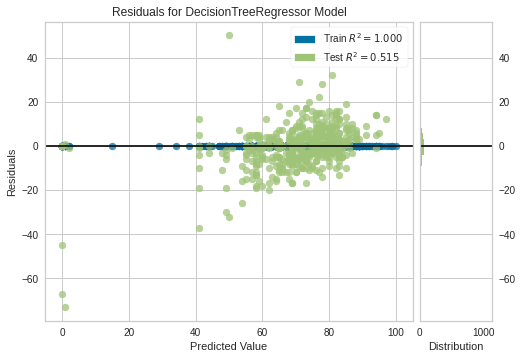

In [ ]:
plot_model(DT, plot = 'residuals')

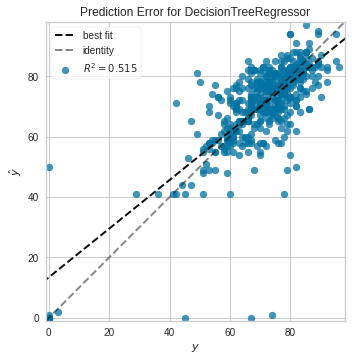

In [ ]:
plot_model(DT, plot = 'error' )

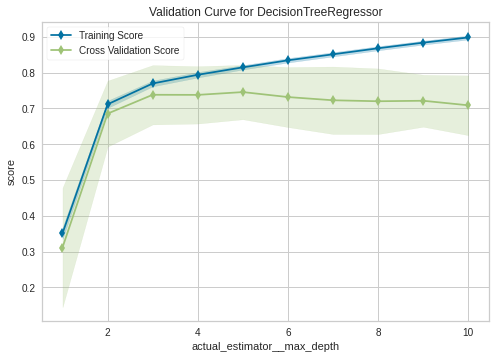

In [ ]:
plot_model(DT, plot = 'vc' )

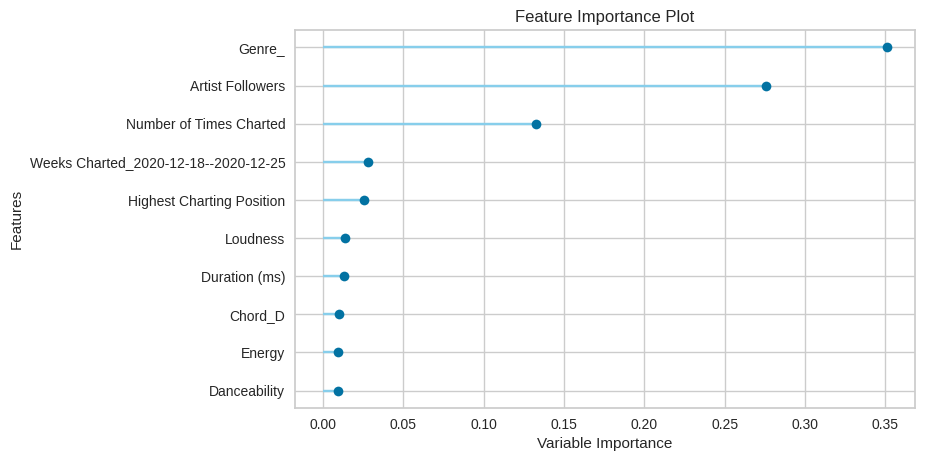

In [ ]:
plot_model(DT, plot = 'feature',  )


In [ ]:
interpret_model(DT, plot = 'reason', observation = 10)

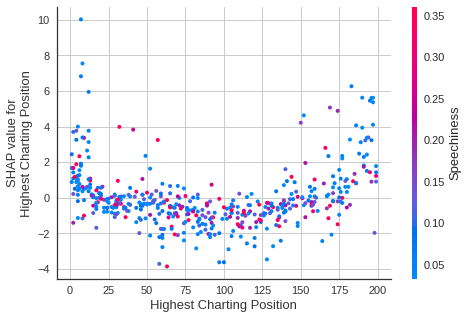

In [ ]:
interpret_model(DT, plot = 'correlation')

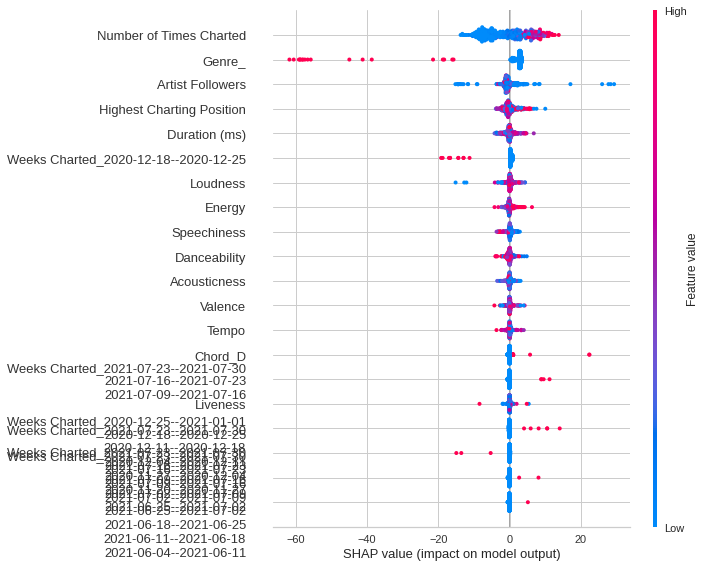

In [ ]:
interpret_model(DT)

In [ ]:
XGB = create_model('xgboost')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,5.4234,63.4880,7.9679,0.7986,0.5128,0.0718
1,5.2045,60.4347,7.7740,0.7869,0.4511,0.0787
2,4.7222,55.0153,7.4172,0.7072,0.2834,0.0755
3,5.0990,43.8827,6.6244,0.7767,0.1306,0.0746
4,4.5023,37.7817,6.1467,0.8925,0.1894,0.0917
5,4.1891,32.2464,5.6786,0.8996,0.2894,0.0785
6,4.8268,41.8409,6.4685,0.8188,0.1933,0.0700
7,5.8747,88.7864,9.4227,0.7101,0.2577,0.1112
8,4.6409,42.6797,6.5330,0.8189,0.1725,0.0687
9,5.1951,60.5759,7.7831,0.7520,0.2387,0.0993


In [ ]:
interpret_model(XGB, plot = 'reason', observation = 10)

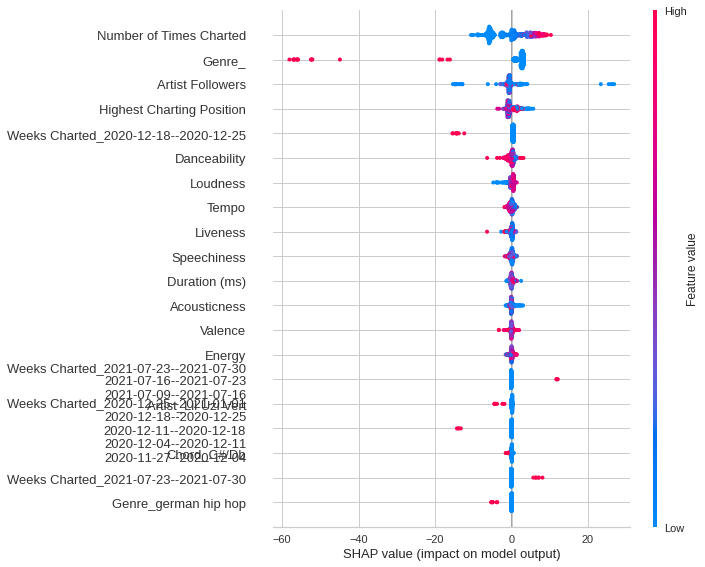

In [ ]:
interpret_model(XGB)

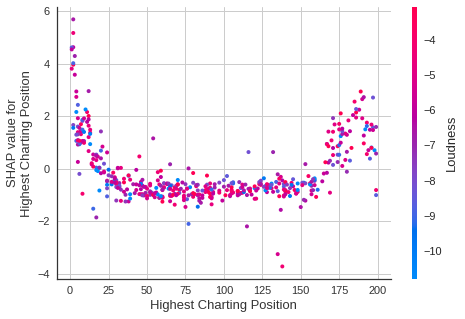

In [ ]:
interpret_model(XGB, plot = 'correlation')

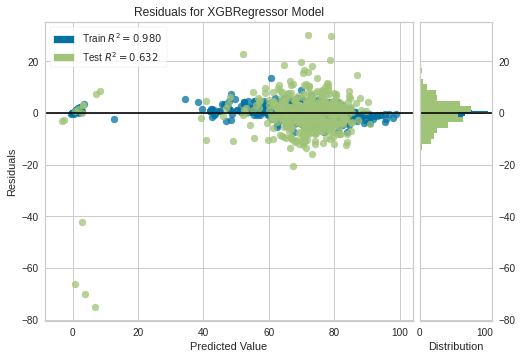

In [ ]:
plot_model(XGB, plot = 'residuals')

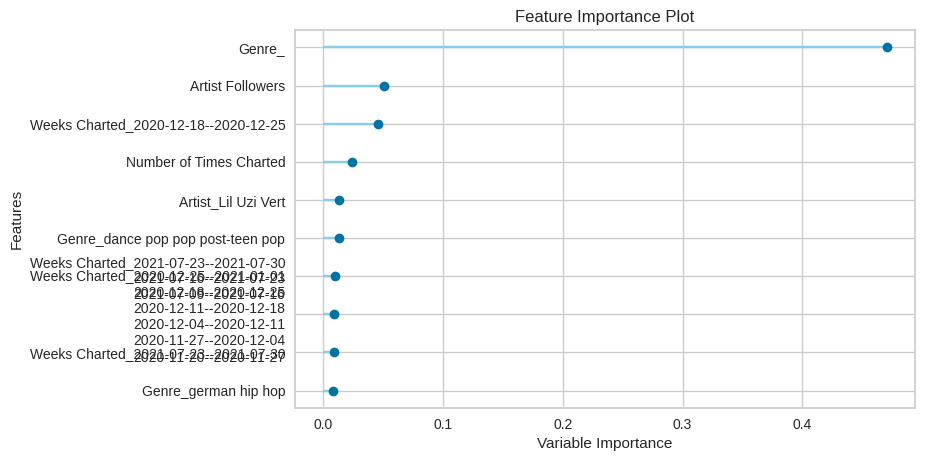

In [ ]:
plot_model(XGB, plot = 'feature',  )